# Check AIS data of the prediction

In [21]:
import pandas as pd
import movingpandas as mpd
import geopandas as gpd


In [44]:
df_fuel

,Unnamed: 0,num,date,Fuel_hour
0,0,1,2021-09-23,68.698140
1,1,1,2021-09-29,66.236069
2,2,1,2021-10-02,61.032067
3,3,1,2022-05-04,66.920969
4,4,1,2022-07-10,52.683726
...,...,...,...,...
204,204,13,2023-08-23,46.346964
205,205,13,2023-11-05,67.765046
206,206,13,2023-12-11,57.240912
207,207,13,2024-02-10,59.948772


In [48]:

# 读取图一和图二的CSV文件
df_fuel = pd.read_csv('/workspaces/SFP/validation_data/predicted_day.csv')  # 替换为图一的文件名
df_AIS = pd.read_csv('/workspaces/SFP/raw_data/1.csv') # 替换为图二的文件名

# 提取日期
# dates = pd.to_datetime(df_fuel['date'], format='mixed').dt.date

# 提取第一个日期
dates = pd.to_datetime(df_fuel.loc[5, 'date'], format='mixed').date()

# 将postime转换为日期格式，提取日期部分
df_AIS['date'] = pd.to_datetime(df_AIS['postime'], format='mixed').dt.date

# # 筛选日期匹配的数据(全部数据提取)
# filtered_df = df_AIS[df_AIS['date'].isin(dates)]

# 筛选特定日期相同的数据（单个数据提取）
filtered_df = df_AIS[df_AIS['date'] == dates]

# 保存筛选后的数据到新的CSV文件
# filtered_df.to_csv('filtered_data.csv', index=False)
filtered_df['postime'] = pd.to_datetime(filtered_df["postime"], format='mixed')
filtered_df['num'] = 1
gdf =  gpd.GeoDataFrame(filtered_df, geometry=gpd.points_from_xy(filtered_df.lon, filtered_df.lat))
gdf

/tmp/ipykernel_7263/1292451033.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['postime'] = pd.to_datetime(filtered_df["postime"], format='mixed')
/tmp/ipykernel_7263/1292451033.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['num'] = 1


,postime,time_diff,lon,lat,distance,对地航速（sog）,航迹向（hdg）,前一个航迹向（pre_hdg）,draught,pre_draught,...,wind_val,wind_direction,wave_val,wave_direction,stream_val,stream_direction,装载状态,date,num,geometry
223190,2023-03-08 00:00:45+00:00,554,159.346878,-22.932407,2.22,14.3,129.0,129.0,11.1,11.1,...,6.35,74.0,1.90,110.0,0.33,170.0,0,2023-03-08,1,POINT (159.34688 -22.93241)
223191,2023-03-08 00:05:14+00:00,269,159.361053,-22.944210,1.06,14.3,128.0,129.0,11.1,11.1,...,6.35,74.0,1.90,110.0,0.33,170.0,0,2023-03-08,1,POINT (159.36105 -22.94421)
223192,2023-03-08 00:08:43+00:00,209,159.372600,-22.953767,0.86,14.4,130.0,128.0,11.1,11.1,...,6.35,74.0,1.90,110.0,0.33,170.0,0,2023-03-08,1,POINT (159.3726 -22.95377)
223193,2023-03-08 00:12:50+00:00,247,159.385595,-22.964793,0.98,14.2,130.0,130.0,11.1,11.1,...,6.55,73.0,1.89,109.0,0.21,175.0,0,2023-03-08,1,POINT (159.3856 -22.96479)
223194,2023-03-08 00:18:15+00:00,325,159.402742,-22.979238,1.28,14.3,130.0,130.0,11.1,11.1,...,6.55,73.0,1.89,109.0,0.21,175.0,0,2023-03-08,1,POINT (159.40274 -22.97924)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223495,2023-03-08 23:39:41+00:00,183,163.890440,-26.656470,0.69,13.9,129.0,129.0,11.1,11.1,...,4.28,351.0,1.55,107.0,0.19,237.0,0,2023-03-08,1,POINT (163.89044 -26.65647)
223496,2023-03-08 23:45:11+00:00,330,163.908302,-26.670572,1.28,13.9,129.0,129.0,11.1,11.1,...,4.28,351.0,1.55,107.0,0.19,237.0,0,2023-03-08,1,POINT (163.9083 -26.67057)
223497,2023-03-08 23:48:20+00:00,189,163.918485,-26.678537,0.73,13.8,129.0,129.0,11.1,11.1,...,4.28,351.0,1.55,107.0,0.19,237.0,0,2023-03-08,1,POINT (163.91848 -26.67854)
223498,2023-03-08 23:53:40+00:00,320,163.935893,-26.692205,1.24,13.8,128.0,129.0,11.1,11.1,...,4.28,351.0,1.55,107.0,0.19,237.0,0,2023-03-08,1,POINT (163.93589 -26.6922)


In [49]:

traj_collection = mpd.TrajectoryCollection(gdf, 'num', t="postime",  crs="EPSG:4326 WGS84")
# traj_collection = mpd.TrajectoryCollection(gdf, 'num', t='t', crs="EPSG:4326 WGS84")
traj_collection.hvplot(title='Trajectory 1', geo=True, hover_cols=['weight'], line_width=1, color='b', tiles='EsriNatGeo', frame_height=500, frame_width=500)
# traj_collection

/home/codespace/.python/current/lib/python3.12/site-packages/movingpandas/trajectory.py:138: TimeZoneWarning: Time zone information dropped from trajectory. All dates and times will use local time. This is applied by doing df.tz_localize(None). To use UTC or a different time zone, convert and drop time zone information prior to trajectory creation.
  warnings.warn(
/home/codespace/.python/current/lib/python3.12/site-packages/movingpandas/trajectory.py:166: MissingCRSWarning: Trajectory generated without CRS. Computations will use Euclidean distances.
  warnings.warn(


/home/codespace/.python/current/lib/python3.12/site-packages/movingpandas/trajectory.py:166: MissingCRSWarning: Trajectory generated without CRS. Computations will use Euclidean distances.
  warnings.warn(


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Path.I   :Path   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (triangle_angle)

In [ ]:


def traj2df(traj_collection):
    # trajectory collection 类转为pandas类，只保留lon, lat两列
    traj_df = traj_collection.to_point_gdf()
    new_traj_df = pd.DataFrame({
        'lon': traj_df['lon'],
        'lat': traj_df['lat']
    })
    return new_traj_df

new_traj_df = traj2df(traj_collection)



,lon,lat
postime,,
2023-03-08 00:00:45,159.346878,-22.932407
2023-03-08 00:05:14,159.361053,-22.944210
2023-03-08 00:08:43,159.372600,-22.953767
2023-03-08 00:12:50,159.385595,-22.964793
2023-03-08 00:18:15,159.402742,-22.979238
...,...,...
2023-03-08 23:39:41,163.890440,-26.656470
2023-03-08 23:45:11,163.908302,-26.670572
2023-03-08 23:48:20,163.918485,-26.678537


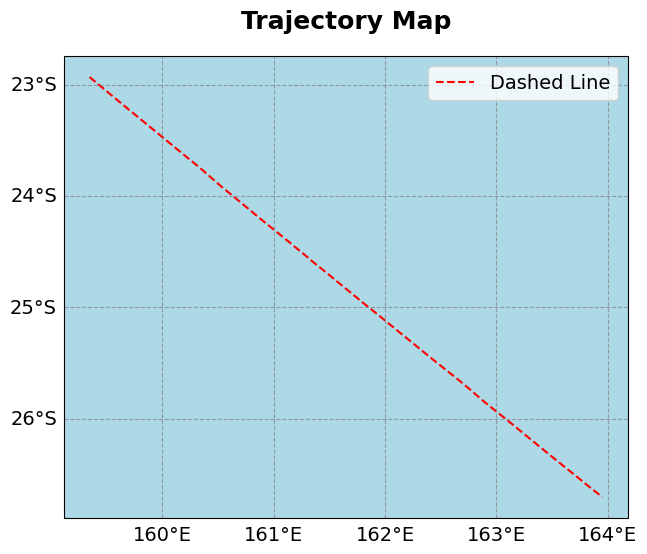

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import logging
def plot_trajectory(traj_df, ax=None, title="Trajectory Map", legend_label="Trajectory", 
                    line_style="-", line_color="blue", line_width=1.5, 
                    point_style=None, point_color="red", point_size=50):
    """
    Plot a trajectory on a map with customizable line and point styles.

    Parameters:
    - traj_df: pandas.DataFrame with two columns ['lon', 'lat'], representing the trajectory points.
    - ax: existing cartopy GeoAxes to draw on (optional). If None, a new plot will be created.
    - title: str, title of the map (only applied if creating a new plot).
    - legend_label: str, label for the trajectory line in the legend.
    - line_style: str, matplotlib line style (e.g., '-', '--'). Default is solid line.
    - line_color: str, color of the line. Default is 'blue'.
    - line_width: float, width of the line. Default is 1.5.
    - point_style: str or None, matplotlib marker style (e.g., 'o', '^'). If None, no points are plotted.
    - point_color: str, color of the points. Default is 'red'.
    - point_size: float, size of the points. Default is 50.

    Returns:
    - fig, ax: The figure and axis objects of the plot.
    """
    # Set global font to Arial
    plt.rcParams['font.family'] = 'Arial'

    # Create a new figure and axis if ax is not provided
    if ax is None:
        projection = ccrs.PlateCarree()
        fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': projection})

        # Add vectorized map features
        ax.add_feature(cfeature.LAND, color='lightgray')  # Add land
        ax.add_feature(cfeature.OCEAN, color='lightblue')  # Add ocean
        ax.add_feature(cfeature.COASTLINE, linewidth=0.8)  # Add coastlines
        ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)  # Add borders

        # Add state/province borders
        states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale='50m',
            facecolor='none'
        )
        ax.add_feature(states_provinces, edgecolor='gray')  # Add state/province borders

        # Add title
        ax.set_title(title, fontsize=18, weight='bold', pad=20)
    else:
        fig = plt.gcf()  # Get the current figure if ax is provided

    # Plot trajectory as a line
    ax.plot(traj_df['lon'], traj_df['lat'], linestyle=line_style, color=line_color, linewidth=line_width, 
            label=legend_label, transform=ccrs.PlateCarree())

    # Plot trajectory points if point_style is specified
    if point_style:
        ax.scatter(traj_df['lon'], traj_df['lat'], color=point_color, edgecolor='black', s=point_size, 
                   marker=point_style, label=f"{legend_label} Points", transform=ccrs.PlateCarree())

    # Add gridlines with labels
    gridlines = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.7)
    gridlines.top_labels = False  # Disable top labels
    gridlines.right_labels = False  # Disable right labels
    gridlines.xlabel_style = {'size': 14, 'color': 'black', 'family': 'Arial'}  # Set longitude label style
    gridlines.ylabel_style = {'size': 14, 'color': 'black', 'family': 'Arial'}  # Set latitude label style

    # Add legend
    ax.legend(fontsize=14)

    return fig, ax


# Example: Plot two trajectories on the same map
# Define trajectory 1 (solid line)
# 定义从横滨到新加坡的第一条轨迹
# start_point_1 = (139.6380, 35.4437)  # 横滨 (lon, lat)
# end_point_1 = (103.8198, 1.3521)    # 新加坡 (lon, lat)
# num_points = 10

# # 生成第一条轨迹
# lons_1 = np.linspace(start_point_1[0], end_point_1[0], num_points)
# lats_1 = np.linspace(start_point_1[1], end_point_1[1], num_points)
# traj_df_1 = pd.DataFrame({'lon': lons_1, 'lat': lats_1})

# # 定义从东京到曼谷的第二条轨迹
# start_point_2 = (139.6917, 35.6895)  # 东京 (lon, lat)
# end_point_2 = (100.5018, 13.7563)   # 曼谷 (lon, lat)

# # 生成第二条轨迹
# lons_2 = np.linspace(start_point_2[0], end_point_2[0], num_points)
# lats_2 = np.linspace(start_point_2[1], end_point_2[1], num_points)
# traj_df_2 = pd.DataFrame({'lon': lons_2, 'lat': lats_2})

# Plot the two trajectories
# fig, ax = plot_trajectory(traj_df_1, title="Two Trajectories on the Same Map", legend_label="Solid Line")
fig, ax = plot_trajectory(new_traj_df, legend_label="Dashed Line", line_style="--", line_color="red")


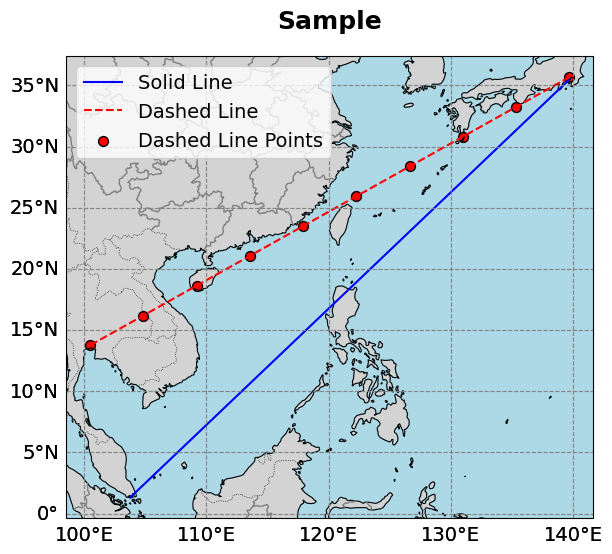

In [111]:
# Example: Plot two trajectories on the same map
# Define trajectory 1 (solid line)
# 定义从横滨到新加坡的第一条轨迹
start_point_1 = (139.6380, 35.4437)  # 横滨 (lon, lat)
end_point_1 = (103.8198, 1.3521)    # 新加坡 (lon, lat)
num_points = 10

# 生成第一条轨迹
lons_1 = np.linspace(start_point_1[0], end_point_1[0], num_points)
lats_1 = np.linspace(start_point_1[1], end_point_1[1], num_points)
traj_df_1 = pd.DataFrame({'lon': lons_1, 'lat': lats_1})

# 定义从东京到曼谷的第二条轨迹
start_point_2 = (139.6917, 35.6895)  # 东京 (lon, lat)
end_point_2 = (100.5018, 13.7563)   # 曼谷 (lon, lat)

# 生成第二条轨迹
lons_2 = np.linspace(start_point_2[0], end_point_2[0], num_points)
lats_2 = np.linspace(start_point_2[1], end_point_2[1], num_points)
traj_df_2 = pd.DataFrame({'lon': lons_2, 'lat': lats_2})

# Plot the two trajectories
fig, ax = plot_trajectory(traj_df_1, title="Sample", legend_label="Solid Line")
fig, ax = plot_trajectory(traj_df_2, ax = ax, legend_label="Dashed Line", line_style="--", line_color="red", point_style='o')
